**Astrological Study on Relationship Success 

In [1]:
pip install numpy


You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [165]:
from tensorflow.keras import layers


ModuleNotFoundError: No module named 'tensorflow'

In [36]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 1.3 MB/s            
     |████████████████████████████████| 2.8 MB 523 kB/s            
     |████████████████████████████████| 944 kB 1.0 MB/s            
     |████████████████████████████████| 63 kB 6.5 MB/s             
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

     |████████████████████████████████| 10.5 MB 10.9 MB/s            
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


**Loading Dataset

In [116]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('relationship_database.csv', na_values=None)
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
dataset.tail()

dataset.describe(include=object)


,PersonA,PersonAURL,PersonB,relationshipType,began,ended,relationship_sexuality,Chiron_Chiron_aspect,Chiron_Chiron_aspectBySign,Jupiter_Chiron_aspect,Jupiter_Chiron_aspectBySign,Chiron_Pluto_aspect,Chiron_Pluto_aspectBySign,Uranus_Chiron_aspect,Uranus_Chiron_aspectBySign,Chiron_Jupiter_aspect,Chiron_Jupiter_aspectBySign,Jupiter_Jupiter_aspect,Jupiter_Jupiter_aspectBySign,Mars_Jupiter_aspect,Mars_Jupiter_aspectBySign,Neptune_Jupiter_aspect,Neptune_Jupiter_aspectBySign,NorthNode_Jupiter_aspect,NorthNode_Jupiter_aspectBySign,Pluto_Jupiter_aspect,Pluto_Jupiter_aspectBySign,Saturn_Jupiter_aspect,Saturn_Jupiter_aspectBySign,SouthNode_Jupiter_aspect,SouthNode_Jupiter_aspectBySign,Uranus_Jupiter_aspect,Uranus_Jupiter_aspectBySign,Mars_Chiron_aspect,Mars_Chiron_aspectBySign,Chiron_Mars_aspect,Chiron_Mars_aspectBySign,Jupiter_Mars_aspect,Jupiter_Mars_aspectBySign,Mars_Mars_aspect,Mars_Mars_aspectBySign,Mars_Neptune_aspect,Mars_Neptune_aspectBySign,Neptune_Mars_aspect,Neptune_Mars_aspectBySign,Mars_NorthNode_aspect,Mars_NorthNode_aspectBySign,NorthNode_Mars_aspect,NorthNode_Mars_aspectBySign,Mars_Pluto_aspect,Mars_Pluto_aspectBySign,Pluto_Mars_aspect,Pluto_Mars_aspectBySign,Mars_Saturn_aspect,Mars_Saturn_aspectBySign,Saturn_Mars_aspect,Saturn_Mars_aspectBySign,Mars_SouthNode_aspect,Mars_SouthNode_aspectBySign,SouthNode_Mars_aspect,SouthNode_Mars_aspectBySign,Mars_Uranus_aspect,Mars_Uranus_aspectBySign,Uranus_Mars_aspect,Uranus_Mars_aspectBySign,Mercury_Chiron_aspect,Mercury_Chiron_aspectBySign,Chiron_Mercury_aspect,Chiron_Mercury_aspectBySign,Mercury_Jupiter_aspect,Mercury_Jupiter_aspectBySign,Jupiter_Mercury_aspect,Jupiter_Mercury_aspectBySign,Mercury_Mars_aspect,Mercury_Mars_aspectBySign,Mars_Mercury_aspect,Mars_Mercury_aspectBySign,Mercury_Mercury_aspect,Mercury_Mercury_aspectBySign,Mercury_Neptune_aspect,Mercury_Neptune_aspectBySign,Neptune_Mercury_aspect,Neptune_Mercury_aspectBySign,Mercury_NorthNode_aspect,Mercury_NorthNode_aspectBySign,NorthNode_Mercury_aspect,NorthNode_Mercury_aspectBySign,Mercury_Pluto_aspect,Mercury_Pluto_aspectBySign,Pluto_Mercury_aspect,Pluto_Mercury_aspectBySign,Mercury_Saturn_aspect,Mercury_Saturn_aspectBySign,Saturn_Mercury_aspect,Saturn_Mercury_aspectBySign,Mercury_SouthNode_aspect,Mercury_SouthNode_aspectBySign,SouthNode_Mercury_aspect,SouthNode_Mercury_aspectBySign,Sun_Mercury_aspect,Sun_Mercury_aspectBySign,Mercury_Sun_aspect,Mercury_Sun_aspectBySign,Mercury_Uranus_aspect,Mercury_Uranus_aspectBySign,Uranus_Mercury_aspect,Uranus_Mercury_aspectBySign,Mercury_Venus_aspect,Mercury_Venus_aspectBySign,Venus_Mercury_aspect,Venus_Mercury_aspectBySign,Moon_Chiron_aspect,Moon_Chiron_aspectBySign,Chiron_Moon_aspect,Chiron_Moon_aspectBySign,Moon_Jupiter_aspect,Moon_Jupiter_aspectBySign,Jupiter_Moon_aspect,Jupiter_Moon_aspectBySign,Moon_Mars_aspect,Moon_Mars_aspectBySign,Mars_Moon_aspect,Mars_Moon_aspectBySign,Moon_Mercury_aspect,Moon_Mercury_aspectBySign,Mercury_Moon_aspect,Mercury_Moon_aspectBySign,Moon_Moon_aspect,Moon_Moon_aspectBySign,Moon_Neptune_aspect,Moon_Neptune_aspectBySign,Neptune_Moon_aspect,Neptune_Moon_aspectBySign,Moon_NorthNode_aspect,Moon_NorthNode_aspectBySign,NorthNode_Moon_aspect,NorthNode_Moon_aspectBySign,Moon_Pluto_aspect,Moon_Pluto_aspectBySign,Pluto_Moon_aspect,Pluto_Moon_aspectBySign,Moon_Saturn_aspect,Moon_Saturn_aspectBySign,Saturn_Moon_aspect,Saturn_Moon_aspectBySign,Moon_SouthNode_aspect,Moon_SouthNode_aspectBySign,SouthNode_Moon_aspect,SouthNode_Moon_aspectBySign,Sun_Moon_aspect,Sun_Moon_aspectBySign,Moon_Sun_aspect,Moon_Sun_aspectBySign,Moon_Uranus_aspect,Moon_Uranus_aspectBySign,Uranus_Moon_aspect,Uranus_Moon_aspectBySign,Moon_Venus_aspect,Moon_Venus_aspectBySign,Venus_Moon_aspect,Venus_Moon_aspectBySign,Neptune_Chiron_aspect,Neptune_Chiron_aspectBySign,Chiron_Neptune_aspect,Chiron_Neptune_aspectBySign,Jupiter_Neptune_aspect,Jupiter_Neptune_aspectBySign,Neptune_Neptune_aspect,Neptune_Neptune_aspectBySign,Pluto_Neptune_aspect,Pluto_Neptune_aspectBySign,Uranus_Neptune_aspect,Uranus_N

**Dataset Cleansing** .. *Removing columns not needed* 

In [117]:
columnsToDrop = ['PersonA', 'PersonAURL', 'PersonBURL', 'PersonB', 'began', 'ended', 'isRumor','PersonALatitude', 'PersonALongitude', 
                'PersonABirthday','PersonBLatitude', 'PersonBLongitude', 'PersonBBirthday', 'somewhat_successful_marriage'  ]

dataset = dataset.drop(columns=columnsToDrop, axis=1)



    
dataset.head()
dataset.describe(include=object)

    


,relationshipType,relationship_sexuality,Chiron_Chiron_aspect,Chiron_Chiron_aspectBySign,Jupiter_Chiron_aspect,Jupiter_Chiron_aspectBySign,Chiron_Pluto_aspect,Chiron_Pluto_aspectBySign,Uranus_Chiron_aspect,Uranus_Chiron_aspectBySign,Chiron_Jupiter_aspect,Chiron_Jupiter_aspectBySign,Jupiter_Jupiter_aspect,Jupiter_Jupiter_aspectBySign,Mars_Jupiter_aspect,Mars_Jupiter_aspectBySign,Neptune_Jupiter_aspect,Neptune_Jupiter_aspectBySign,NorthNode_Jupiter_aspect,NorthNode_Jupiter_aspectBySign,Pluto_Jupiter_aspect,Pluto_Jupiter_aspectBySign,Saturn_Jupiter_aspect,Saturn_Jupiter_aspectBySign,SouthNode_Jupiter_aspect,SouthNode_Jupiter_aspectBySign,Uranus_Jupiter_aspect,Uranus_Jupiter_aspectBySign,Mars_Chiron_aspect,Mars_Chiron_aspectBySign,Chiron_Mars_aspect,Chiron_Mars_aspectBySign,Jupiter_Mars_aspect,Jupiter_Mars_aspectBySign,Mars_Mars_aspect,Mars_Mars_aspectBySign,Mars_Neptune_aspect,Mars_Neptune_aspectBySign,Neptune_Mars_aspect,Neptune_Mars_aspectBySign,Mars_NorthNode_aspect,Mars_NorthNode_aspectBySign,NorthNode_Mars_aspect,NorthNode_Mars_aspectBySign,Mars_Pluto_aspect,Mars_Pluto_aspectBySign,Pluto_Mars_aspect,Pluto_Mars_aspectBySign,Mars_Saturn_aspect,Mars_Saturn_aspectBySign,Saturn_Mars_aspect,Saturn_Mars_aspectBySign,Mars_SouthNode_aspect,Mars_SouthNode_aspectBySign,SouthNode_Mars_aspect,SouthNode_Mars_aspectBySign,Mars_Uranus_aspect,Mars_Uranus_aspectBySign,Uranus_Mars_aspect,Uranus_Mars_aspectBySign,Mercury_Chiron_aspect,Mercury_Chiron_aspectBySign,Chiron_Mercury_aspect,Chiron_Mercury_aspectBySign,Mercury_Jupiter_aspect,Mercury_Jupiter_aspectBySign,Jupiter_Mercury_aspect,Jupiter_Mercury_aspectBySign,Mercury_Mars_aspect,Mercury_Mars_aspectBySign,Mars_Mercury_aspect,Mars_Mercury_aspectBySign,Mercury_Mercury_aspect,Mercury_Mercury_aspectBySign,Mercury_Neptune_aspect,Mercury_Neptune_aspectBySign,Neptune_Mercury_aspect,Neptune_Mercury_aspectBySign,Mercury_NorthNode_aspect,Mercury_NorthNode_aspectBySign,NorthNode_Mercury_aspect,NorthNode_Mercury_aspectBySign,Mercury_Pluto_aspect,Mercury_Pluto_aspectBySign,Pluto_Mercury_aspect,Pluto_Mercury_aspectBySign,Mercury_Saturn_aspect,Mercury_Saturn_aspectBySign,Saturn_Mercury_aspect,Saturn_Mercury_aspectBySign,Mercury_SouthNode_aspect,Mercury_SouthNode_aspectBySign,SouthNode_Mercury_aspect,SouthNode_Mercury_aspectBySign,Sun_Mercury_aspect,Sun_Mercury_aspectBySign,Mercury_Sun_aspect,Mercury_Sun_aspectBySign,Mercury_Uranus_aspect,Mercury_Uranus_aspectBySign,Uranus_Mercury_aspect,Uranus_Mercury_aspectBySign,Mercury_Venus_aspect,Mercury_Venus_aspectBySign,Venus_Mercury_aspect,Venus_Mercury_aspectBySign,Moon_Chiron_aspect,Moon_Chiron_aspectBySign,Chiron_Moon_aspect,Chiron_Moon_aspectBySign,Moon_Jupiter_aspect,Moon_Jupiter_aspectBySign,Jupiter_Moon_aspect,Jupiter_Moon_aspectBySign,Moon_Mars_aspect,Moon_Mars_aspectBySign,Mars_Moon_aspect,Mars_Moon_aspectBySign,Moon_Mercury_aspect,Moon_Mercury_aspectBySign,Mercury_Moon_aspect,Mercury_Moon_aspectBySign,Moon_Moon_aspect,Moon_Moon_aspectBySign,Moon_Neptune_aspect,Moon_Neptune_aspectBySign,Neptune_Moon_aspect,Neptune_Moon_aspectBySign,Moon_NorthNode_aspect,Moon_NorthNode_aspectBySign,NorthNode_Moon_aspect,NorthNode_Moon_aspectBySign,Moon_Pluto_aspect,Moon_Pluto_aspectBySign,Pluto_Moon_aspect,Pluto_Moon_aspectBySign,Moon_Saturn_aspect,Moon_Saturn_aspectBySign,Saturn_Moon_aspect,Saturn_Moon_aspectBySign,Moon_SouthNode_aspect,Moon_SouthNode_aspectBySign,SouthNode_Moon_aspect,SouthNode_Moon_aspectBySign,Sun_Moon_aspect,Sun_Moon_aspectBySign,Moon_Sun_aspect,Moon_Sun_aspectBySign,Moon_Uranus_aspect,Moon_Uranus_aspectBySign,Uranus_Moon_aspect,Uranus_Moon_aspectBySign,Moon_Venus_aspect,Moon_Venus_aspectBySign,Venus_Moon_aspect,Venus_Moon_aspectBySign,Neptune_Chiron_aspect,Neptune_Chiron_aspectBySign,Chiron_Neptune_aspect,Chiron_Neptune_aspectBySign,Jupiter_Neptune_aspect,Jupiter_Neptune_aspectBySign,Neptune_Neptune_aspect,Neptune_Neptune_aspectBySign,Pluto_Neptune_aspect,Pluto_Neptune_aspectBySign,Uranus_Neptune_aspect,Uranus_Neptune_aspectBySign,NorthNode_Chiron_as

**Dataset Subsets**

In [137]:
encounters = dataset[dataset["relationshipType"] == 'Encounter'] 
relationships = dataset[dataset["relationshipType"] == 'Relationship'] 
marriages = dataset[dataset["relationshipType"] == 'Married'] 
successful_marriages = dataset[dataset["length"] >=  240 ]
unsuccessful_marriages = dataset[dataset["length"] <=  120 ]


*The number of relationships we have* 

In [95]:
len(dataset)

12684

**Some Dataset Statistics**

In [138]:
dataset["relationshipType"].value_counts()

Relationship    5775
Encounter       3527
Married         2896
Unknown          476
On-Screen          8
Name: relationshipType, dtype: int64

In [71]:
dataset["relationship_sexuality"].value_counts()

mf       11389
mm         852
ff         417
other       26
Name: relationship_sexuality, dtype: int64

In [109]:

dataset["Sun_Sun_aspectBySign"].value_counts()

SEXTILE        8563
TRINE          2142
CONJUNCTION    1038
OPPOSITION      941
Name: Sun_Sun_aspectBySign, dtype: int64

In [108]:
dataset["Sun_Sun_aspect"].value_counts()

NO ASPECT      4186
SEXTILE        2138
TRINE          2127
SQUARE         2088
OPPOSITION     1100
CONJUNCTION    1045
Name: Sun_Sun_aspect, dtype: int64

In [76]:
 dataset["Moon_Moon_aspectBySign"].value_counts()

INCONJUNCT     3822
SQUARE         1977
SEXTILE        1926
SEMISEXTILE    1759
TRINE          1203
CONJUNCTION    1112
OPPOSISTION     885
Name: Moon_Moon_aspectBySign, dtype: int64

In [77]:
 dataset["Moon_Moon_aspect"].value_counts()

NO ASPECT      5850
SQUARE         1783
TRINE          1647
SEXTILE        1639
CONJUNCTION     886
OPPOSITION      879
Name: Moon_Moon_aspect, dtype: int64

In [114]:
 dataset["Mars_Mars_aspectBySign"].value_counts()

QUINCUNX       3588
SEMISEXTILE    2190
SQUARE         1849
SEXTILE        1786
TRINE          1268
CONJUNCTION    1043
OPPOSISTION     960
Name: Mars_Mars_aspectBySign, dtype: int64

In [113]:
 dataset["Mars_Mars_aspect"].value_counts()

NO ASPECT         4737
SQUARE            1191
SEXTILE           1175
TRINE             1118
CONJUNCTION        561
OPPOSITION         527
SEMIQUINTILE       466
QUINTILE           462
QUINCUNX           427
SESQUISQUARE       427
BIQUINTILE         412
SESQUIQUINTILE     400
SEMISEXTILE        393
SEMISQUARE         388
Name: Mars_Mars_aspect, dtype: int64

In [17]:
 dataset["Mars_Venus_aspect"].value_counts()

NO ASPECT         4004
TRINE              933
SQUARE             915
SEXTILE            914
OPPOSITION         494
CONJUNCTION        450
QUINCUNX           382
QUINTILE           363
SESQUIQUINTILE     358
SEMISEXTILE        351
SEMISQUARE         348
SEMIQUINTILE       341
SESQUISQUARE       331
BIQUINTILE         323
Name: Mars_Venus_aspect, dtype: int64

In [79]:
 dataset["Venus_Mars_aspect"].value_counts()

NO ASPECT      8232
SQUARE         1116
SEXTILE        1115
TRINE          1078
OPPOSITION      609
CONJUNCTION     534
Name: Venus_Mars_aspect, dtype: int64

In [81]:
 dataset["Venus_Venus_aspect"].value_counts()

NO ASPECT      8803
SEXTILE        1004
SQUARE          982
TRINE           918
CONJUNCTION     495
OPPOSITION      482
Name: Venus_Venus_aspect, dtype: int64

In [20]:
 dataset["Venus_Venus_aspectBySign"].value_counts()

INCONJUNCT     3092
SQUARE         1689
SEXTILE        1565
SEMISEXTILE    1532
TRINE           975
CONJUNCTION     881
OPPOSISTION     773
Name: Venus_Venus_aspectBySign, dtype: int64

**Studying The Aspects**

How the **SUN SIGN** compares in different relationship types

Across **Encounters**

<AxesSubplot:ylabel='Sun_Sun_aspect'>

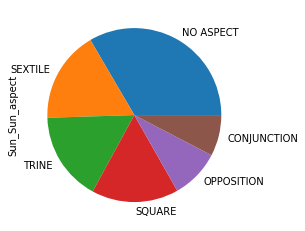

In [82]:
dataset.loc[dataset["relationshipType"] == 'Encounter', "Sun_Sun_aspect"].value_counts().plot(kind='pie')

In [83]:
dataset.loc[dataset["relationshipType"] == 'Encounter', "Sun_Sun_aspectBySign"].value_counts()

INCONJUNCT     904
SQUARE         615
SEMISEXTILE    590
SEXTILE        440
TRINE          348
OPPOSISTION    338
CONJUNCTION    292
Name: Sun_Sun_aspectBySign, dtype: int64

Across **Relationship** but *No Marriage* 

**By aspect** but not by sign

In [33]:
dataset.loc[dataset["relationshipType"] == 'Relationship', "Sun_Sun_aspect"].value_counts()

TRINE           816
SEXTILE         809
NO ASPECT       781
SQUARE          765
OPPOSITION      407
CONJUNCTION     392
SEMISEXTILE     179
SEMIQUINTILE    170
QUINCUNX        153
BIQUINTILE      121
SEMISQUARE       87
SESQUISQUARE     66
Name: Sun_Sun_aspect, dtype: int64

<AxesSubplot:ylabel='Sun_Sun_aspectBySign'>

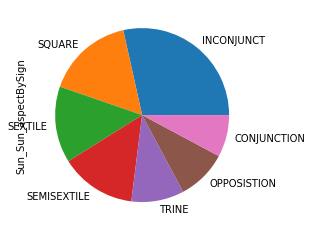

In [39]:
dataset.loc[dataset["relationshipType"] == 'Relationship', "Sun_Sun_aspectBySign"].value_counts().plot(kind='pie')

Across **Marriages** not necessarily successful 

In [54]:
unsuccessful_marriages["Sun_Sun_aspect"].value_counts()

NO ASPECT       679
SEXTILE         657
SQUARE          651
TRINE           648
CONJUNCTION     341
OPPOSITION      341
SEMISEXTILE     136
SEMIQUINTILE    133
QUINCUNX        114
BIQUINTILE      113
SEMISQUARE       94
SESQUISQUARE     55
Name: Sun_Sun_aspect, dtype: int64

In [56]:
unsuccessful_marriages["Sun_Sun_aspectBySign"].value_counts()

INCONJUNCT     1122
SQUARE          666
SEMISEXTILE     570
SEXTILE         524
TRINE           393
OPPOSISTION     350
CONJUNCTION     337
Name: Sun_Sun_aspectBySign, dtype: int64

In [55]:
successful_marriages["Sun_Sun_aspect"].value_counts()

NO ASPECT       129
SQUARE          110
SEXTILE         109
TRINE           102
CONJUNCTION      56
OPPOSITION       51
SEMIQUINTILE     27
QUINCUNX         25
BIQUINTILE       23
SEMISEXTILE      20
SEMISQUARE       19
SESQUISQUARE     14
Name: Sun_Sun_aspect, dtype: int64

In [57]:
successful_marriages["Sun_Sun_aspectBySign"].value_counts()

INCONJUNCT     210
SQUARE         114
SEXTILE         96
SEMISEXTILE     89
TRINE           67
CONJUNCTION     55
OPPOSISTION     54
Name: Sun_Sun_aspectBySign, dtype: int64

Series([], Name: somewhat_successful_marriage, dtype: int64)

In [58]:
unsuccessful_marriages["Venus_Venus_aspect"].value_counts()

NO ASPECT         1679
SEXTILE            321
SQUARE             300
TRINE              296
OPPOSITION         163
CONJUNCTION        161
BIQUINTILE         141
SEMISQUARE         138
QUINTILE           133
SEMISEXTILE        132
SESQUIQUINTILE     130
SEMIQUINTILE       125
QUINCUNX           125
SESQUISQUARE       118
Name: Venus_Venus_aspect, dtype: int64

In [59]:
successful_marriages["Venus_Venus_aspect"].value_counts()

NO ASPECT         294
SQUARE             68
TRINE              46
SEXTILE            42
SEMISQUARE         32
CONJUNCTION        30
SEMISEXTILE        27
QUINCUNX           26
SESQUIQUINTILE     26
OPPOSITION         22
SEMIQUINTILE       21
SESQUISQUARE       20
QUINTILE           19
BIQUINTILE         12
Name: Venus_Venus_aspect, dtype: int64

In [60]:
successful_marriages["Moon_Moon_aspect"].value_counts()

NO ASPECT         154
SQUARE            109
TRINE              96
SEXTILE            79
CONJUNCTION        56
OPPOSITION         51
QUINCUNX           26
BIQUINTILE         24
SEMISQUARE         21
SESQUISQUARE       20
SEMISEXTILE        19
SEMIQUINTILE       14
SESQUIQUINTILE      8
QUINTILE            8
Name: Moon_Moon_aspect, dtype: int64

In [103]:
unsuccessful_marriages["Moon_Moon_aspect"].value_counts()

NO ASPECT      2274
SQUARE          675
SEXTILE         668
TRINE           619
OPPOSITION      357
CONJUNCTION     350
Name: Moon_Moon_aspect, dtype: int64

In [101]:
unsuccessful_marriages["Moon_Moon_aspectBySign"].value_counts()

SEXTILE        3430
TRINE           769
CONJUNCTION     450
OPPOSITION      294
Name: Moon_Moon_aspectBySign, dtype: int64

In [100]:
successful_marriages["Moon_Moon_aspectBySign"].value_counts()

SEXTILE        556
TRINE          128
CONJUNCTION     85
OPPOSITION      62
Name: Moon_Moon_aspectBySign, dtype: int64

In [139]:
relationship_dataset = dataset.copy()
relationship_dataset = dataset[dataset["length"] > 0] 
relationship_dataset = relationship_dataset[relationship_dataset.relationshipType != 'Unknown']
relationship_dataset = relationship_dataset[relationship_dataset.relationshipType != 'On-Screen']
relationship_dataset.isna().sum()
relationship_dataset= relationship_dataset.dropna(axis=1)
relationship_dataset.tail()
relationship_dataset["relationship_sexuality"].value_counts()
relationship_dataset["relationshipType"].value_counts()


Relationship    3350
Married         2492
Encounter        571
Name: relationshipType, dtype: int64

5195


One Hot Encode Categortical Data

In [155]:
#pd.get_dummies(df['country'], prefix='country')



mapOfAspects = {1: 'TRINE',
                2: 'CONJUNCTION',
                3: 'SEXTILE',
                4: 'SEMIQUINTILE',
                5: 'QUINTILE',
                6: 'SESQUIQUINTILE',
                7: 'BIQUINTILE', 
                8: 'SQUARE', 
                9: 'SEMISQUARE', 
                10: 'SESQUISQUARE', 
                11: 'OPPOSITION', 
                12: 'QUINCUNX',
                13: 'NO ASPECT'

               }

relationship_dataset_corrected = relationship_dataset.copy()

"""
for col in relationship_dataset.columns:
    if col != 'length' and col  != 'relationshipType' and col != 'relationship_sexuality'  : 
        relationship_dataset_corrected[col] = relationship_dataset_corrected[col].map(mapOfAspects)
 """   
        
        
relationship_dataset_corrected.head()




,relationshipType,length,relationship_sexuality,Chiron_Chiron_aspect,Chiron_Chiron_aspectBySign,Jupiter_Chiron_aspect,Jupiter_Chiron_aspectBySign,Chiron_Pluto_aspect,Chiron_Pluto_aspectBySign,Uranus_Chiron_aspect,Uranus_Chiron_aspectBySign,Chiron_Jupiter_aspect,Chiron_Jupiter_aspectBySign,Jupiter_Jupiter_aspect,Jupiter_Jupiter_aspectBySign,Mars_Jupiter_aspect,Mars_Jupiter_aspectBySign,Neptune_Jupiter_aspect,Neptune_Jupiter_aspectBySign,NorthNode_Jupiter_aspect,NorthNode_Jupiter_aspectBySign,Pluto_Jupiter_aspect,Pluto_Jupiter_aspectBySign,Saturn_Jupiter_aspect,Saturn_Jupiter_aspectBySign,SouthNode_Jupiter_aspect,SouthNode_Jupiter_aspectBySign,Uranus_Jupiter_aspect,Uranus_Jupiter_aspectBySign,Mars_Chiron_aspect,Mars_Chiron_aspectBySign,Chiron_Mars_aspect,Chiron_Mars_aspectBySign,Jupiter_Mars_aspect,Jupiter_Mars_aspectBySign,Mars_Mars_aspect,Mars_Mars_aspectBySign,Mars_Neptune_aspect,Mars_Neptune_aspectBySign,Neptune_Mars_aspect,Neptune_Mars_aspectBySign,Mars_NorthNode_aspect,Mars_NorthNode_aspectBySign,NorthNode_Mars_aspect,NorthNode_Mars_aspectBySign,Mars_Pluto_aspect,Mars_Pluto_aspectBySign,Pluto_Mars_aspect,Pluto_Mars_aspectBySign,Mars_Saturn_aspect,Mars_Saturn_aspectBySign,Saturn_Mars_aspect,Saturn_Mars_aspectBySign,Mars_SouthNode_aspect,Mars_SouthNode_aspectBySign,SouthNode_Mars_aspect,SouthNode_Mars_aspectBySign,Mars_Uranus_aspect,Mars_Uranus_aspectBySign,Uranus_Mars_aspect,Uranus_Mars_aspectBySign,Mercury_Chiron_aspect,Mercury_Chiron_aspectBySign,Chiron_Mercury_aspect,Chiron_Mercury_aspectBySign,Mercury_Jupiter_aspect,Mercury_Jupiter_aspectBySign,Jupiter_Mercury_aspect,Jupiter_Mercury_aspectBySign,Mercury_Mars_aspect,Mercury_Mars_aspectBySign,Mars_Mercury_aspect,Mars_Mercury_aspectBySign,Mercury_Mercury_aspect,Mercury_Mercury_aspectBySign,Mercury_Neptune_aspect,Mercury_Neptune_aspectBySign,Neptune_Mercury_aspect,Neptune_Mercury_aspectBySign,Mercury_NorthNode_aspect,Mercury_NorthNode_aspectBySign,NorthNode_Mercury_aspect,NorthNode_Mercury_aspectBySign,Mercury_Pluto_aspect,Mercury_Pluto_aspectBySign,Pluto_Mercury_aspect,Pluto_Mercury_aspectBySign,Mercury_Saturn_aspect,Mercury_Saturn_aspectBySign,Saturn_Mercury_aspect,Saturn_Mercury_aspectBySign,Mercury_SouthNode_aspect,Mercury_SouthNode_aspectBySign,SouthNode_Mercury_aspect,SouthNode_Mercury_aspectBySign,Sun_Mercury_aspect,Sun_Mercury_aspectBySign,Mercury_Sun_aspect,Mercury_Sun_aspectBySign,Mercury_Uranus_aspect,Mercury_Uranus_aspectBySign,Uranus_Mercury_aspect,Uranus_Mercury_aspectBySign,Mercury_Venus_aspect,Mercury_Venus_aspectBySign,Venus_Mercury_aspect,Venus_Mercury_aspectBySign,Moon_Chiron_aspect,Moon_Chiron_aspectBySign,Chiron_Moon_aspect,Chiron_Moon_aspectBySign,Moon_Jupiter_aspect,Moon_Jupiter_aspectBySign,Jupiter_Moon_aspect,Jupiter_Moon_aspectBySign,Moon_Mars_aspect,Moon_Mars_aspectBySign,Mars_Moon_aspect,Mars_Moon_aspectBySign,Moon_Mercury_aspect,Moon_Mercury_aspectBySign,Mercury_Moon_aspect,Mercury_Moon_aspectBySign,Moon_Moon_aspect,Moon_Moon_aspectBySign,Moon_Neptune_aspect,Moon_Neptune_aspectBySign,Neptune_Moon_aspect,Neptune_Moon_aspectBySign,Moon_NorthNode_aspect,Moon_NorthNode_aspectBySign,NorthNode_Moon_aspect,NorthNode_Moon_aspectBySign,Moon_Pluto_aspect,Moon_Pluto_aspectBySign,Pluto_Moon_aspect,Pluto_Moon_aspectBySign,Moon_Saturn_aspect,Moon_Saturn_aspectBySign,Saturn_Moon_aspect,Saturn_Moon_aspectBySign,Moon_SouthNode_aspect,Moon_SouthNode_aspectBySign,SouthNode_Moon_aspect,SouthNode_Moon_aspectBySign,Sun_Moon_aspect,Sun_Moon_aspectBySign,Moon_Sun_aspect,Moon_Sun_aspectBySign,Moon_Uranus_aspect,Moon_Uranus_aspectBySign,Uranus_Moon_aspect,Uranus_Moon_aspectBySign,Moon_Venus_aspect,Moon_Venus_aspectBySign,Venus_Moon_aspect,Venus_Moon_aspectBySign,Neptune_Chiron_aspect,Neptune_Chiron_aspectBySign,Chiron_Neptune_aspect,Chiron_Neptune_aspectBySign,Jupiter_Neptune_aspect,Jupiter_Neptune_aspectBySign,Neptune_Neptune_aspect,Neptune_Neptune_aspectBySign,Pluto_Neptune_aspect,Pluto_Neptune_aspectBySign,Uranus_Neptune_aspect,Uranus_Neptune_aspectBySign,NorthNode_Ch

In [156]:
train_dataset = relationship_dataset.sample(frac=0.8, random_state=0)
test_dataset = relationship_dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('length')
test_labels = test_features.pop('length')



**Normalizing**

In [161]:
import tensorflow as tf 

ModuleNotFoundError: No module named 'tensorflow'

In [160]:
normalizer = tf.keras.layers.Normalization(axis=-1)

NameError: name 'tf' is not defined

In [61]:
normalizer.adapt(np.array(train_features))

,count,mean,std,min,25%,50%,75%,max
PersonALatitude,4156.0,3.98e+01,1.35e+01,-4.29e+01,3.55e+01,4.09e+01,4.71e+01,6.41e+01
PersonALongitude,4156.0,-5.29e+01,5.70e+01,-1.58e+02,-9.33e+01,-7.40e+01,1.14e+00,1.75e+02
PersonABirthday,4156.0,-8.48e+08,9.36e+08,-6.69e+09,-1.45e+09,-8.20e+08,-7.99e+07,1.50e+09
PersonBLatitude,4156.0,4.01e+01,1.32e+01,-4.29e+01,3.61e+01,4.13e+01,4.76e+01,6.41e+01
PersonBLongitude,4156.0,-5.10e+01,5.65e+01,-1.58e+02,-9.31e+01,-7.40e+01,2.30e+00,1.75e+02
...,...,...,...,...,...,...,...,...
SouthNode_Venus_orb,3177.0,4.59e+00,3.58e+00,4.95e-03,1.56e+00,3.19e+00,7.74e+00,1.20e+01
Venus_Sun_orb,3482.0,6.38e+00,4.53e+00,1.68e-03,2.14e+00,5.74e+00,1.04e+01,1.50e+01
Venus_Uranus_orb,2407.0,2.56e+00,1.86e+00,2.56e-03,1.08e+00,2.17e+00,3.67e+00,6.98e+00
Uranus_Venus_orb,2355.0,2.63e+00,1.89e+00,3.11e-03,1.15e+00,2.15e+00,3.93e+00,6.99e+00


In [159]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('length')
test_labels = test_features.pop('length')

In [158]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
length,96.82,148.8


In [ ]:
normalizer.adapt(np.array(train_features))